<a name="top" id="top"></a>

<div align="center">

<h1>PSO 4: PID Controller Tuning using the Practical Ziegler-Nichols Method</h1>

<p>
  <a href="https://github.com/bernalde"><strong>David E. Bernal Neira</strong></a><br>
  <em>Davidson School of Chemical Engineering, Purdue University</em><br>
  <em>Universities Space Research Association</em><br>
  <em>NASA QuAIL</em>
</p>

<br>

<p>
  <a href="https://github.com/mhuertasm"><strong>Mateo Huertas Marulanda</strong></a><br>
  <em>Chemical Engineering, National University of Colombia</em><br>
  <em>Undergraduate Visiting Scholar</em>
</p>

<br>

<p>
  <a href="https://colab.research.google.com" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
  </a>
  <a href="https://secquoia.github.io/">
    <img src="https://img.shields.io/badge/🌲⚛️🌐-SECQUOIA-blue" alt="SECQUOIA">
  </a>
</p>

</div>


## 🎯 Objective:
In this exercise, we will tune a PID controller using the "practical" Ziegler-Nichols method for a third-order process (a cascade of three reactors). The "practical" Ziegler-Nichols method is widely used in industry as it does not require knowledge of the process transfer function. Instead, it is based on experimentally determining the ultimate gain (Ku) and ultimate period (Tu) through sustained oscillations.

---

## 💻 Code Purpose:
The purpose of this notebook is to guide you through the process of tuning a PID controller using the Ziegler-Nichols method. We will:
1. Set up a P-controller.
2. Tune the controller until sustained oscillations occur.
3. Determine the ultimate gain (Ku) and ultimate period (Tu).
4. Apply the Ziegler-Nichols tuning rules to compute the PID parameters.
5. Simulate the closed-loop system and compare performance with both practical and analytical methods.

---

## 🔑 Key Functions:

- `ct.series()`: To create series connections between systems (e.g., controller and process).
- `ct.feedback()`: To create a closed-loop system with feedback.


---

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Define the transfer functions

In [2]:
# Define the transfer functions for the system components (e.g., reactors)
num1 = [6]
den1 = [2, 1]
sys1 = ct.TransferFunction(num1, den1)

num2 = [1]
den2 = [4, 1]
sys2 = ct.TransferFunction(num2, den2)

num3 = [1]
den3 = [6, 1]
sys3 = ct.TransferFunction(num3, den3)

# Define the total system

In [3]:
# Define the total system (cascade of three reactors)
systotal = ct.series(sys1, ct.series(sys2, sys3))

# Define the time array

In [4]:
# Time vector for simulation
t = np.linspace(0, 100, 1000)

# Define the initial P-Controller

In [5]:
# Step 1: Initial P-Controller (Ku=1.67) Found manually
Ku = 1.67 # Ultimate gain
C_pid = ct.TransferFunction([Ku], [1])

# Define the closed loop with P-Controller

In [6]:
# Closed-loop system with P-controller
sys_open_loop = ct.series(C_pid, systotal)
sys_closed_loop = ct.feedback(sys_open_loop, 1) # Negative feedback

# Evaluate P-controller response

In [7]:
t, y = ct.step_response(sys_closed_loop, t)

# Experimental Determination of Ultimate Gain (Ku)
In this step, you manually adjust the value of the P-controller gain (Kp or Ku) until the closed-loop system reaches sustained oscillations. This is typically done through experimentation by gradually increasing the gain and observing the system's response.

Ultimate Gain (Ku): This is the gain at which the system begins to oscillate continuously.

Ultimate Period (Tu): This is the period of the oscillation observed at the ultimate gain.

# Determine the Ultimate Period (Tu)
Using the oscillation data from the previous step, determine the ultimate period (Tu). This can be done by measuring the time it takes for one full oscillation (one cycle of the waveform).

# Apply the Ziegler-Nichols Tuning Rules
With the ultimate gain (Ku) and ultimate period (Tu) determined, we now apply the Ziegler-Nichols tuning rules to calculate the PID controller parameters.

The Ziegler-Nichols rules for PID tuning are:

$$
K_p = 0.6 \cdot K_u
$$

$$
T_i = 0.5 \cdot T_u,
$$
which is the time period for the integral controller

$$
T_d = 0.125 \cdot T_u
$$
which is the time period for the derivative controller


$$
K_i = \frac{K_p}{T_i}, 
$$
which is the gain for the integral controller
$$
K_d = K_p \cdot T_d, 
$$
which is the gain for the derivative controller

Now, calculate the PID parameters:

In [8]:
# ZN-Tuned PID
Tu = 12.7 # Found manually (Ultimate time)
Kp = 0.6 * Ku
Ti = 0.5 * Tu
Td = 0.125 * Tu

Ki = Kp / Ti
Kd = Kp * Td

# Define PID transfer function 

The general form for a PID controller's transfer function is given by:

$G_c(s) = K_ds + \frac{K_i}{s} + K_p$

or equivalently,

$ G_c(s) =  \frac{K_ds^2 + K_ps + K_i}{s}$

In [17]:
num_pid1 = [Kd, Kp, Ki]  # Correct: Kd*s² + Kp*s + Ki
den_pid1 = [1, 0]
C_pid1 = ct.TransferFunction(num_pid1, den_pid1)

# Define the closed-loop system with PID

In [18]:
sys_open_loop_1 = ct.series(C_pid1, systotal)
sys_closed_loop_1 = ct.feedback(sys_open_loop_1, 1)

# Simulate PID response

In [19]:
t1, y1 = ct.step_response(sys_closed_loop_1, t)

# Plot both responses

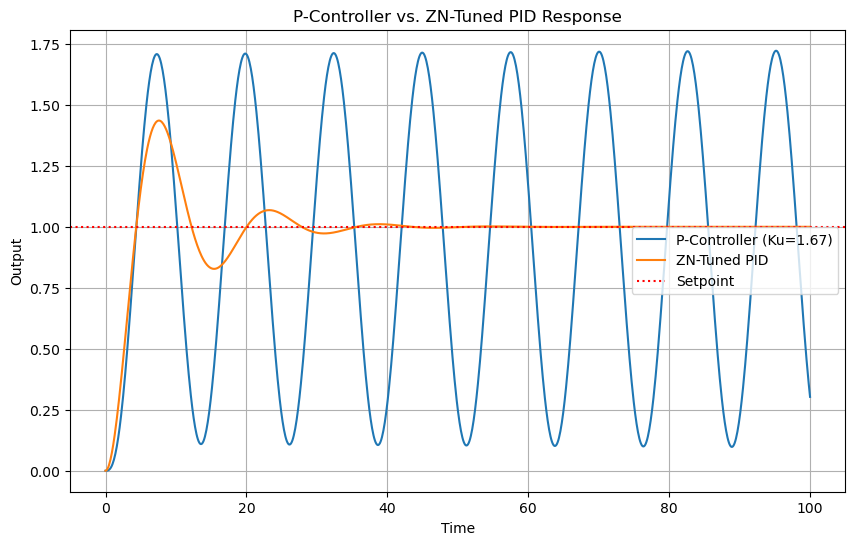

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='P-Controller (Ku=1.67)')
plt.plot(t1, y1, label='ZN-Tuned PID')
plt.axhline(y=1, color='r', linestyle=':', label='Setpoint')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('P-Controller vs. ZN-Tuned PID Response')
plt.grid(True)
plt.legend()
plt.show()

---
## ✅ Conclusion:

In this exercise, we successfully tuned a PID controller for a third-order process using the **Practical Ziegler-Nichols (ZN) Method**. This method is highly valuable in industrial practice as it requires no prior knowledge of the process transfer function, relying instead on experimentally determining the **ultimate gain (Ku)** and **ultimate period (Tu)** based on sustained oscillations.

Key observations from the tuning process:

- **P-Controller (Ku = 1.67)**:  
  - Applying only proportional control at the ultimate gain led to **sustained oscillations** without convergence to the setpoint.
  - The amplitude of the oscillations remained constant over time, confirming that the system was operating at the edge of stability.
  - This experimental step allowed accurate identification of Ku and Tu, which are critical for proper PID tuning.

- **ZN-Tuned PID Controller**:  
  - By applying the Ziegler-Nichols tuning rules to the obtained Ku and Tu, we calculated suitable PID parameters.
  - The resulting PID controller produced a **damped response**, significantly reducing oscillations and quickly stabilizing around the setpoint.
  - Although the initial response showed slight overshoot, it progressively corrected itself, demonstrating the effectiveness of the tuning.

The ZN-tuned PID controller achieved stability, fast convergence, and minimal steady-state error. Overall, the practical Ziegler-Nichols method proved to be a reliable and efficient strategy for tuning controllers without prior process knowledge.

---